## HR employee Attrition

In [69]:
## Importing all the libraries..

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [70]:
## Read the data...

pd.set_option("display.max.columns", 50)
df_emp = pd.read_csv("HR_Employee_Attrition_Data.csv")
df_emp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# Exploratory Data Analysis

- Get the number of Rows and columns

In [71]:
df_emp.shape

(2940, 35)

In [72]:
df_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [73]:
## check for any missing/ null value in the data

df_emp.isnull().values.any()

False

- we don't have any missing value or NULL value in our data.

In [74]:
## view some statistics 

df_emp.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,1.102658,4707.155770,7116.575021,2.497584,3.659315,0.360762,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8045.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,4.000000,8380.000000,20462.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Data Preprocessing

In [75]:
## information about categorical columns

df_emp.describe(include=["object"])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,2940,2940,2940,2940,2940,2940,2940,2940,2940
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,2466,2086,1922,1212,1764,652,1346,2940,2108


In [76]:
## Finding unique values in each of the columns...

for column in df_emp.columns:
    print(f"{column}: {df_emp[column].nunique()} unique values")
    print("----------------------------------------------------------")

Age: 43 unique values
----------------------------------------------------------
Attrition: 2 unique values
----------------------------------------------------------
BusinessTravel: 3 unique values
----------------------------------------------------------
DailyRate: 886 unique values
----------------------------------------------------------
Department: 3 unique values
----------------------------------------------------------
DistanceFromHome: 29 unique values
----------------------------------------------------------
Education: 5 unique values
----------------------------------------------------------
EducationField: 6 unique values
----------------------------------------------------------
EmployeeCount: 1 unique values
----------------------------------------------------------
EmployeeNumber: 2940 unique values
----------------------------------------------------------
EnvironmentSatisfaction: 4 unique values
----------------------------------------------------------
Gender: 2 un

In [77]:
df_emp[['StandardHours','EmployeeCount']].describe()

,StandardHours,EmployeeCount
count,2940.0,2940.0
mean,80.0,1.0
std,0.0,0.0
min,80.0,1.0
25%,80.0,1.0
50%,80.0,1.0
75%,80.0,1.0
max,80.0,1.0


In [78]:
df_emp[['EmployeeNumber']].nunique()

EmployeeNumber    2940
dtype: int64

In [79]:
## The two columns 'StandardHours', 'EmployeeCount' don't have any statistical significance...

- For columns [' EmployeeCount','Over18','StandardHours'] are having only one unique value, and the column "EmployeeNumber" is   Employee identification number an ID variable, which does not help in getting any insight about attrition
  so they can be dropped...

In [80]:
df_emp.drop(columns=['EmployeeCount','Over18','StandardHours'], axis= 'columns', inplace=True)
df_emp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [81]:
df_emp.shape

(2940, 32)

In [82]:
## Checking for duplicate values 

df_emp.duplicated().sum()

0

## Data Visualization..

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Bar plot of Attrition')

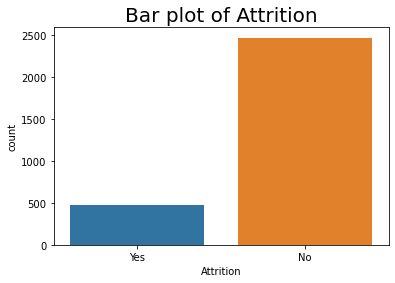

In [83]:
# visualize the number of employee who stayed or left 

sns.countplot(df_emp['Attrition'])
plt.title('Bar plot of Attrition', fontsize= 20)

In [84]:
## Plotting Histogram for all the numerical columns...

num_cols = df_emp.select_dtypes(include = np.number)


# Numerical Features

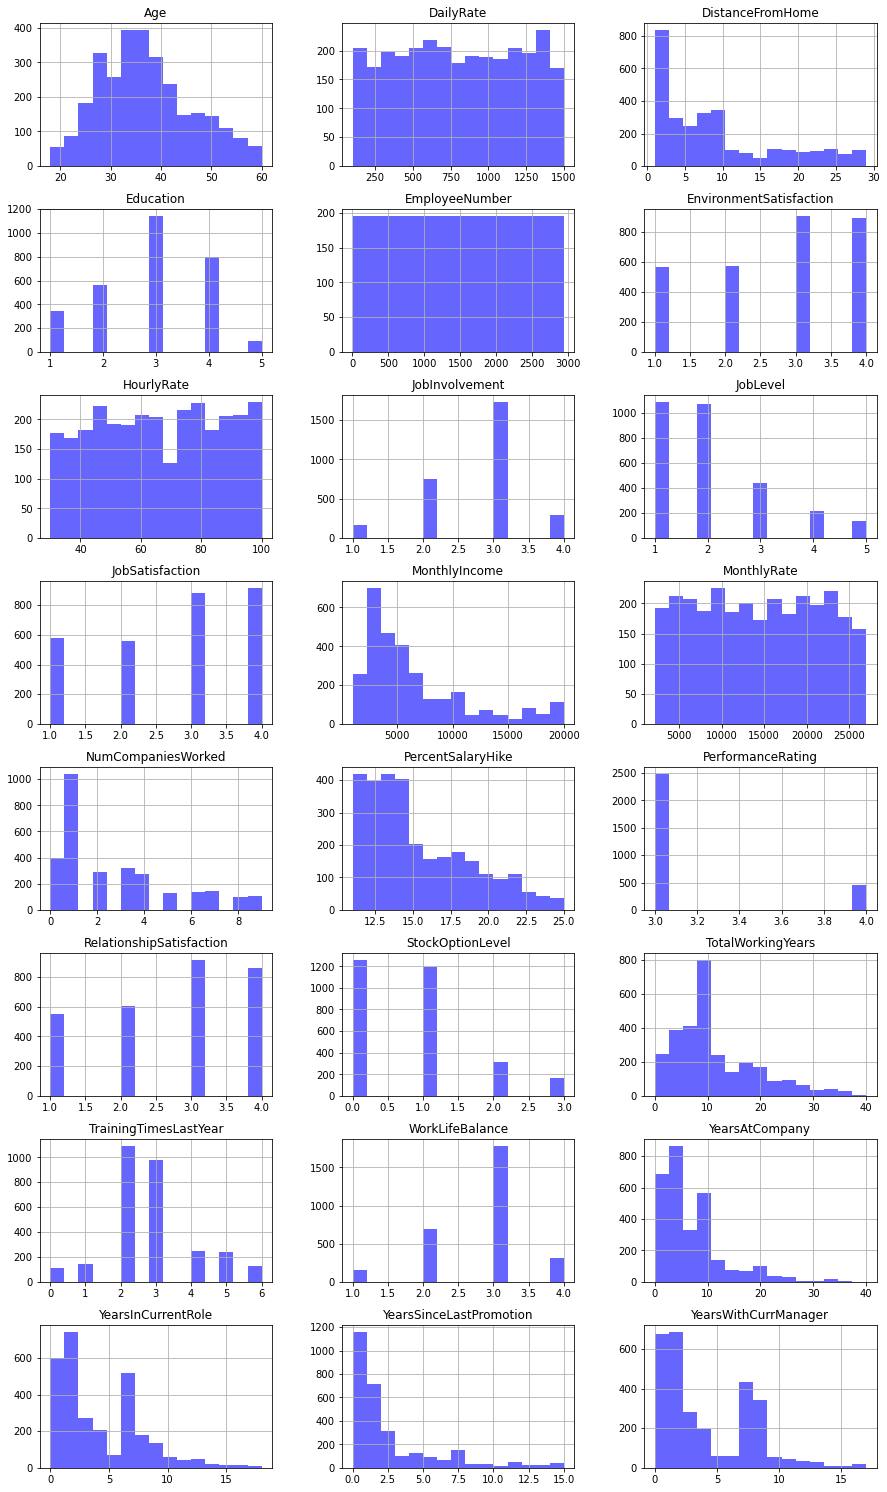

In [85]:
a = num_cols[num_cols.columns].hist(bins =15 , figsize = (15,30) , layout = (9,3) , color = 'blue', alpha = 0.6 )

In [86]:
disc_col = []
for column in df_emp.columns:
    if df_emp[column].dtypes != object and df_emp[column].nunique() < 30:
        print(f"{column} : {df_emp[column].unique()}")
        disc_col.append(column)
        print("====================================")


DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Education : [2 1 4 3 5]
EnvironmentSatisfaction : [2 3 4 1]
JobInvolvement : [3 2 4 1]
JobLevel : [2 1 3 4 5]
JobSatisfaction : [4 2 3 1]
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
PerformanceRating : [3 4]
RelationshipSatisfaction : [1 4 2 3]
StockOptionLevel : [0 1 3 2]
TrainingTimesLastYear : [0 3 2 5 1 4 6]
WorkLifeBalance : [1 3 2 4]
YearsInCurrentRole : [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
YearsSinceLastPromotion : [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]
YearsWithCurrManager : [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]


In [87]:
# Percentage of no of employees stayed or left

df_emp['Attrition'].value_counts()/df_emp.shape[0] * 100

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

The Rate of Attrition is 16.12%

## Numerical features vs Attrition

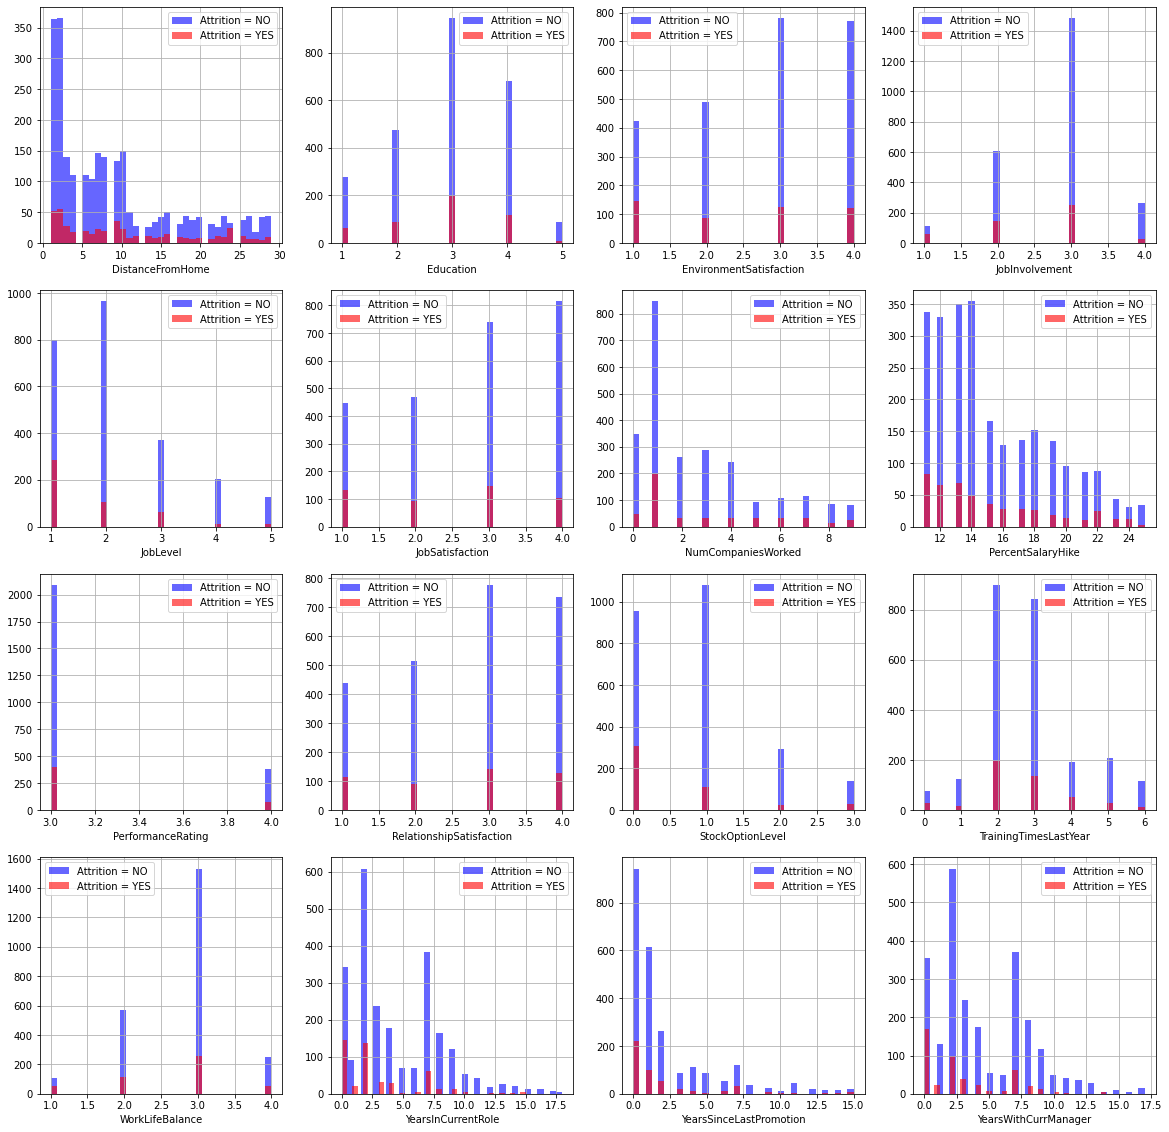

In [88]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(disc_col, 1):
    plt.subplot(4, 4, i)
    df_emp[df_emp["Attrition"] == 'No'][column].hist(bins=35, color='blue', label='Attrition = NO',alpha=0.6)
    df_emp[df_emp["Attrition"] == 'Yes'][column].hist(bins=35, color='red', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

Insight: Only 'PercentSalaryHike' is giving the information that for less 'PercentSalaryHike' Attrition is more..
    Other numerical features when plotted with Attrition not giving any significant insight.. 

In [89]:
cont_col = []
for column in df_emp.columns:
    if df_emp[column].dtypes != object and df_emp[column].nunique() > 30:
        print(f"{column} : {df_emp[column].nunique()} unique values")
        cont_col.append(column)
        print("====================================")
cont_col.remove('EmployeeNumber')

Age : 43 unique values
DailyRate : 886 unique values
EmployeeNumber : 2940 unique values
HourlyRate : 71 unique values
MonthlyIncome : 1349 unique values
MonthlyRate : 1427 unique values
TotalWorkingYears : 40 unique values
YearsAtCompany : 37 unique values


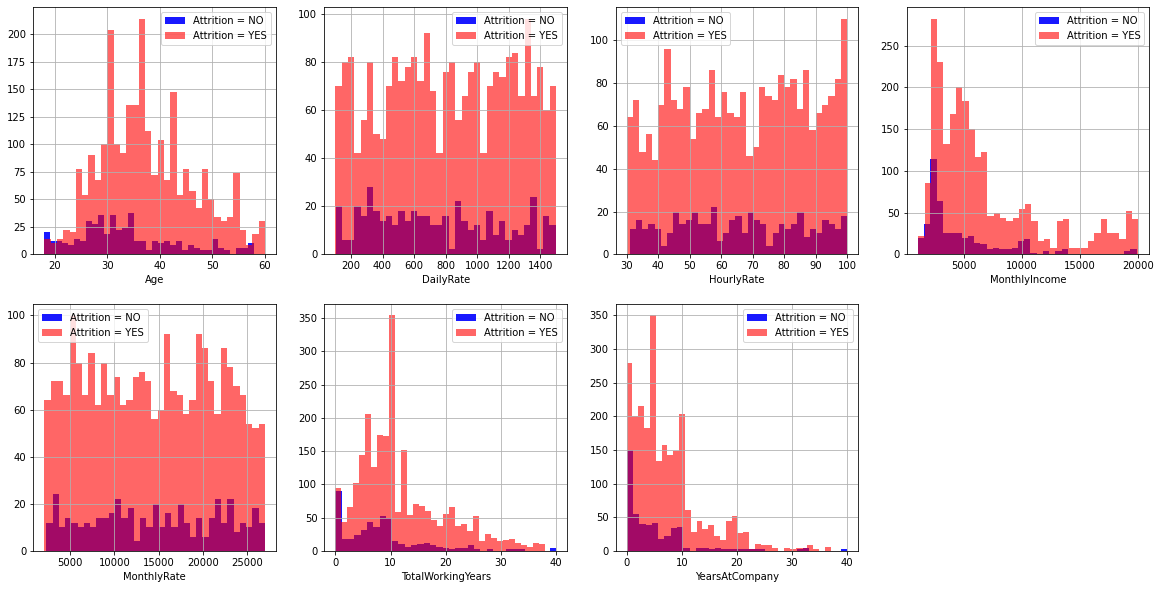

In [90]:
plt.figure(figsize=(20, 10))

for i, column in enumerate(cont_col, 1):
    plt.subplot(2, 4, i)
    df_emp[df_emp["Attrition"] == 'Yes'][column].hist(bins=35, color='blue', label='Attrition = NO', alpha=0.9)
    df_emp[df_emp["Attrition"] == 'No'][column].hist(bins=35, color='red', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [91]:
## PLotting Individual columns VS Attrition..

<AxesSubplot:xlabel='Age', ylabel='count'>

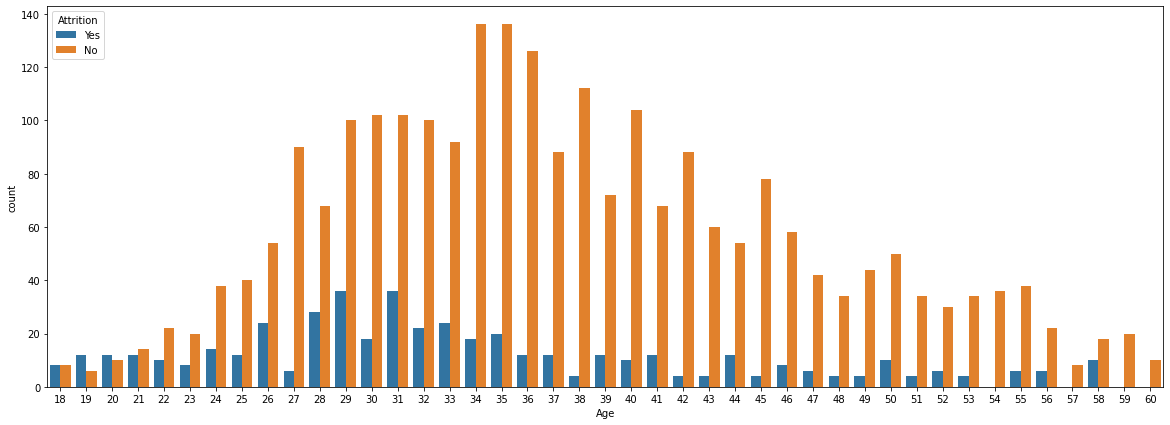

In [92]:
## Age Vs Attrition

plt.figure(figsize = (20,7))
sns.countplot(x='Age',data = df_emp , hue = 'Attrition')




Insight: For age group 25 to 35, attrition rate is higher as can be seen from above two plots.

<AxesSubplot:xlabel='HourlyRate', ylabel='count'>

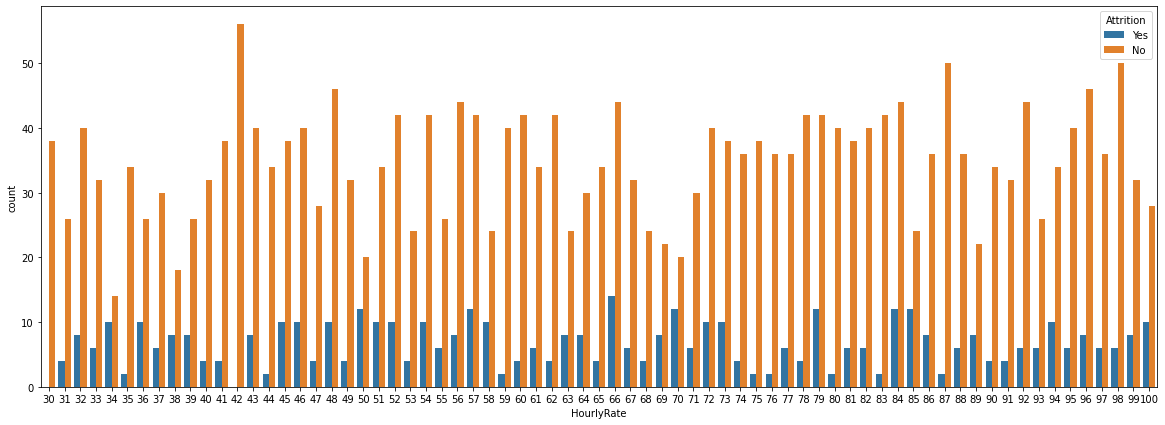

In [93]:
## HourlyRate VS Attrition

plt.figure(figsize = (20,7))
sns.countplot(x='HourlyRate',data = df_emp , hue =  'Attrition')

Insight: Hourly rate has no significant role in attrition.

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='count'>

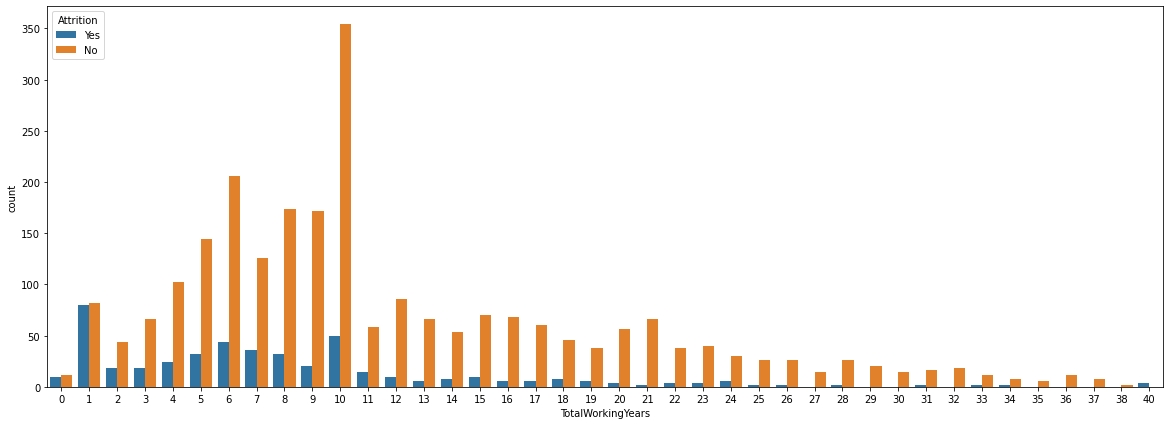

In [94]:
## TotalWorkingYears VS Attrition

plt.figure(figsize = (20,7))
sns.countplot(x='TotalWorkingYears',data = df_emp , hue = 'Attrition')

Insight: Employees with more years of experience are less likely to leave the company.

<AxesSubplot:xlabel='YearsAtCompany', ylabel='count'>

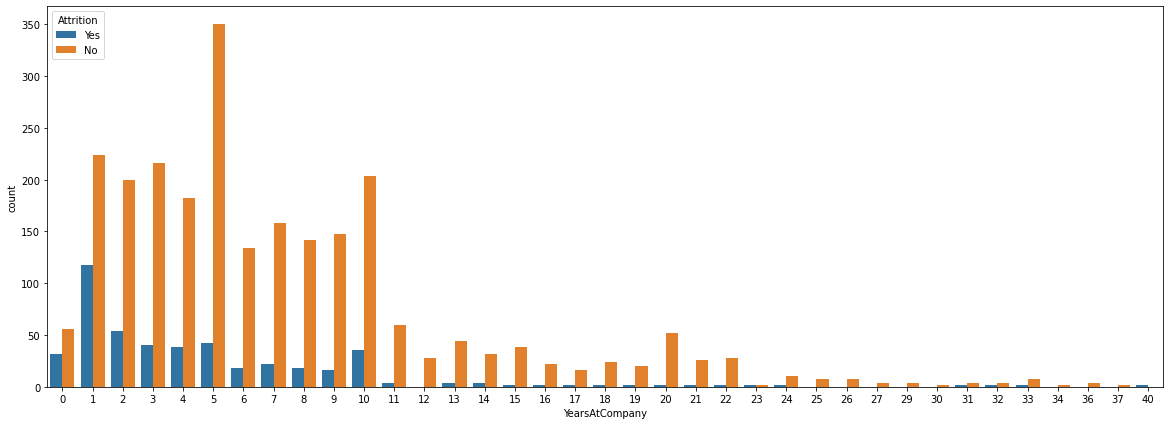

In [95]:
## YearsAtCompany VS Attrition

plt.figure(figsize = (20,7))
sns.countplot(x='YearsAtCompany',data = df_emp , hue = 'Attrition')

Insight: From the above plot we can see that Attrition is less in case of people having more number of Years with the current company..

In [96]:
## information about categorical columns

df_emp.describe(include=["object"])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,2940,2940,2940,2940,2940,2940,2940,2940
unique,2,3,3,6,2,9,3,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,2466,2086,1922,1212,1764,652,1346,2108


<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

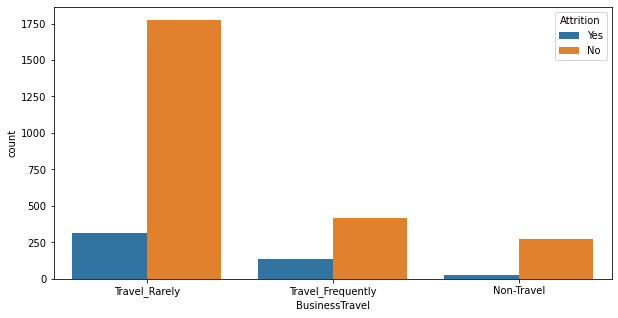

In [97]:
## BusinessTravel VS Attrition

plt.figure(figsize=(10,5))
sns.countplot(x = 'BusinessTravel',data = df_emp ,hue="Attrition")

<AxesSubplot:xlabel='Department', ylabel='count'>

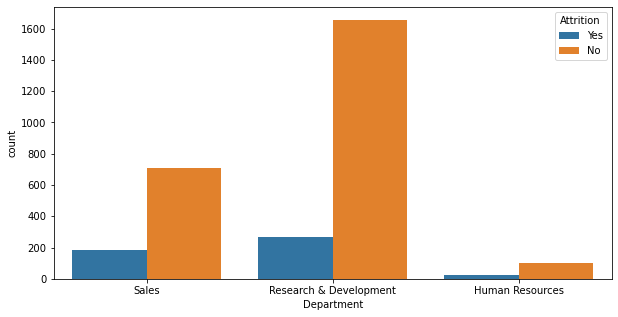

In [98]:
## Department VS Attrition

plt.figure(figsize=(10,5))
sns.countplot(x = 'Department',data = df_emp ,hue="Attrition")

Insight: for [Department] => The worker in Research & Development are more likely to stay than the workers on other departement.

<AxesSubplot:xlabel='Gender', ylabel='count'>

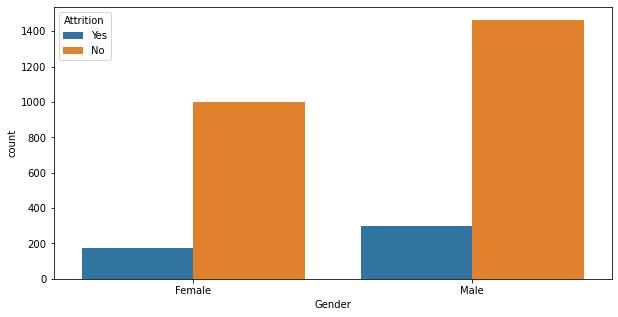

In [99]:
## Department VS Attrition

plt.figure(figsize=(10,5))
sns.countplot(x = 'Gender',data = df_emp ,hue="Attrition")

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

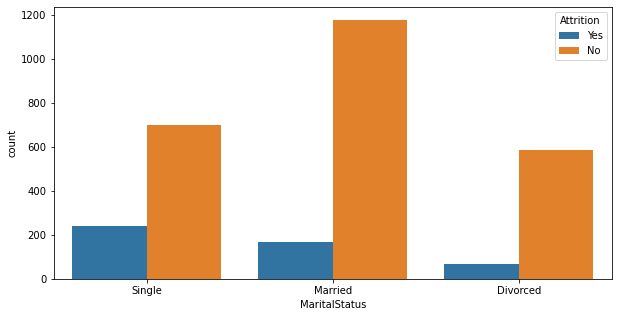

In [100]:
## MaritalStatus VS Attrition

plt.figure(figsize=(10,5))
sns.countplot(x = 'MaritalStatus',data = df_emp ,hue="Attrition")

Insight: People whose marital status is Single are more likely to leave the company as compared to Married and Divorced People.

<AxesSubplot:xlabel='OverTime', ylabel='count'>

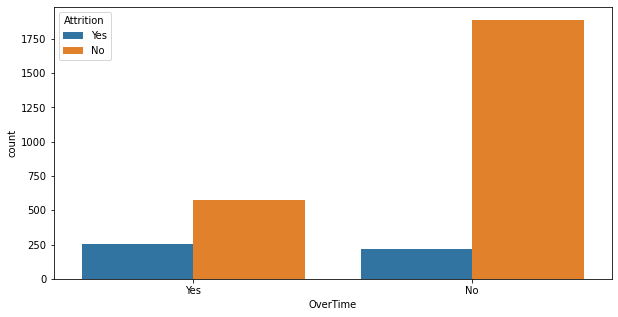

In [101]:
## OverTime VS Attrition

plt.figure(figsize=(10,5))
sns.countplot(x = 'OverTime',data = df_emp ,hue="Attrition")

<AxesSubplot:xlabel='EducationField', ylabel='count'>

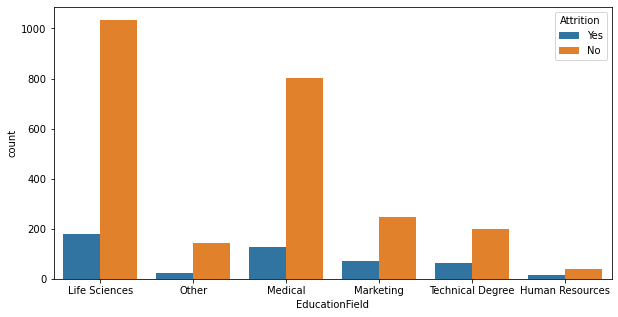

In [102]:
# EducationField VS Attrition

plt.figure(figsize=(10,5))
sns.countplot(x = 'EducationField',data = df_emp ,hue="Attrition")

Conclusion:

## Correlation Matrix

In [103]:
corr =df_emp.drop(columns=['EmployeeNumber'], axis= 'columns').corr()

corr

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,0.034814,0.149515,-0.027269,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5]),
 [Text(0, 0.5, 'Age'),
  Text(0, 1.5, 'DailyRate'),
  Text(0, 2.5, 'DistanceFromHome'),
  Text(0, 3.5, 'Education'),
  Text(0, 4.5, 'EmployeeNumber'),
  Text(0, 5.5, 'EnvironmentSatisfaction'),
  Text(0, 6.5, 'HourlyRate'),
  Text(0, 7.5, 'JobInvolvement'),
  Text(0, 8.5, 'JobLevel'),
  Text(0, 9.5, 'JobSatisfaction'),
  Text(0, 10.5, 'MonthlyIncome'),
  Text(0, 11.5, 'MonthlyRate'),
  Text(0, 12.5, 'NumCompaniesWorked'),
  Text(0, 13.5, 'PercentSalaryHike'),
  Text(0, 14.5, 'PerformanceRating'),
  Text(0, 15.5, 'RelationshipSatisfaction'),
  Text(0, 16.5, 'StockOptionLevel'),
  Text(0, 17.5, 'TotalWorkingYears'),
  Text(0, 18.5, 'TrainingTimesLastYear'),
  Text(0, 19.5, 'WorkLifeBalance'),
  Text(0, 20.5, 'YearsAtCompany'),
  Text(0, 21.5, 'YearsInCurrentRole'),
  Text(0, 22.5, 'YearsSinceLastPromotion'),
  Text(0, 23

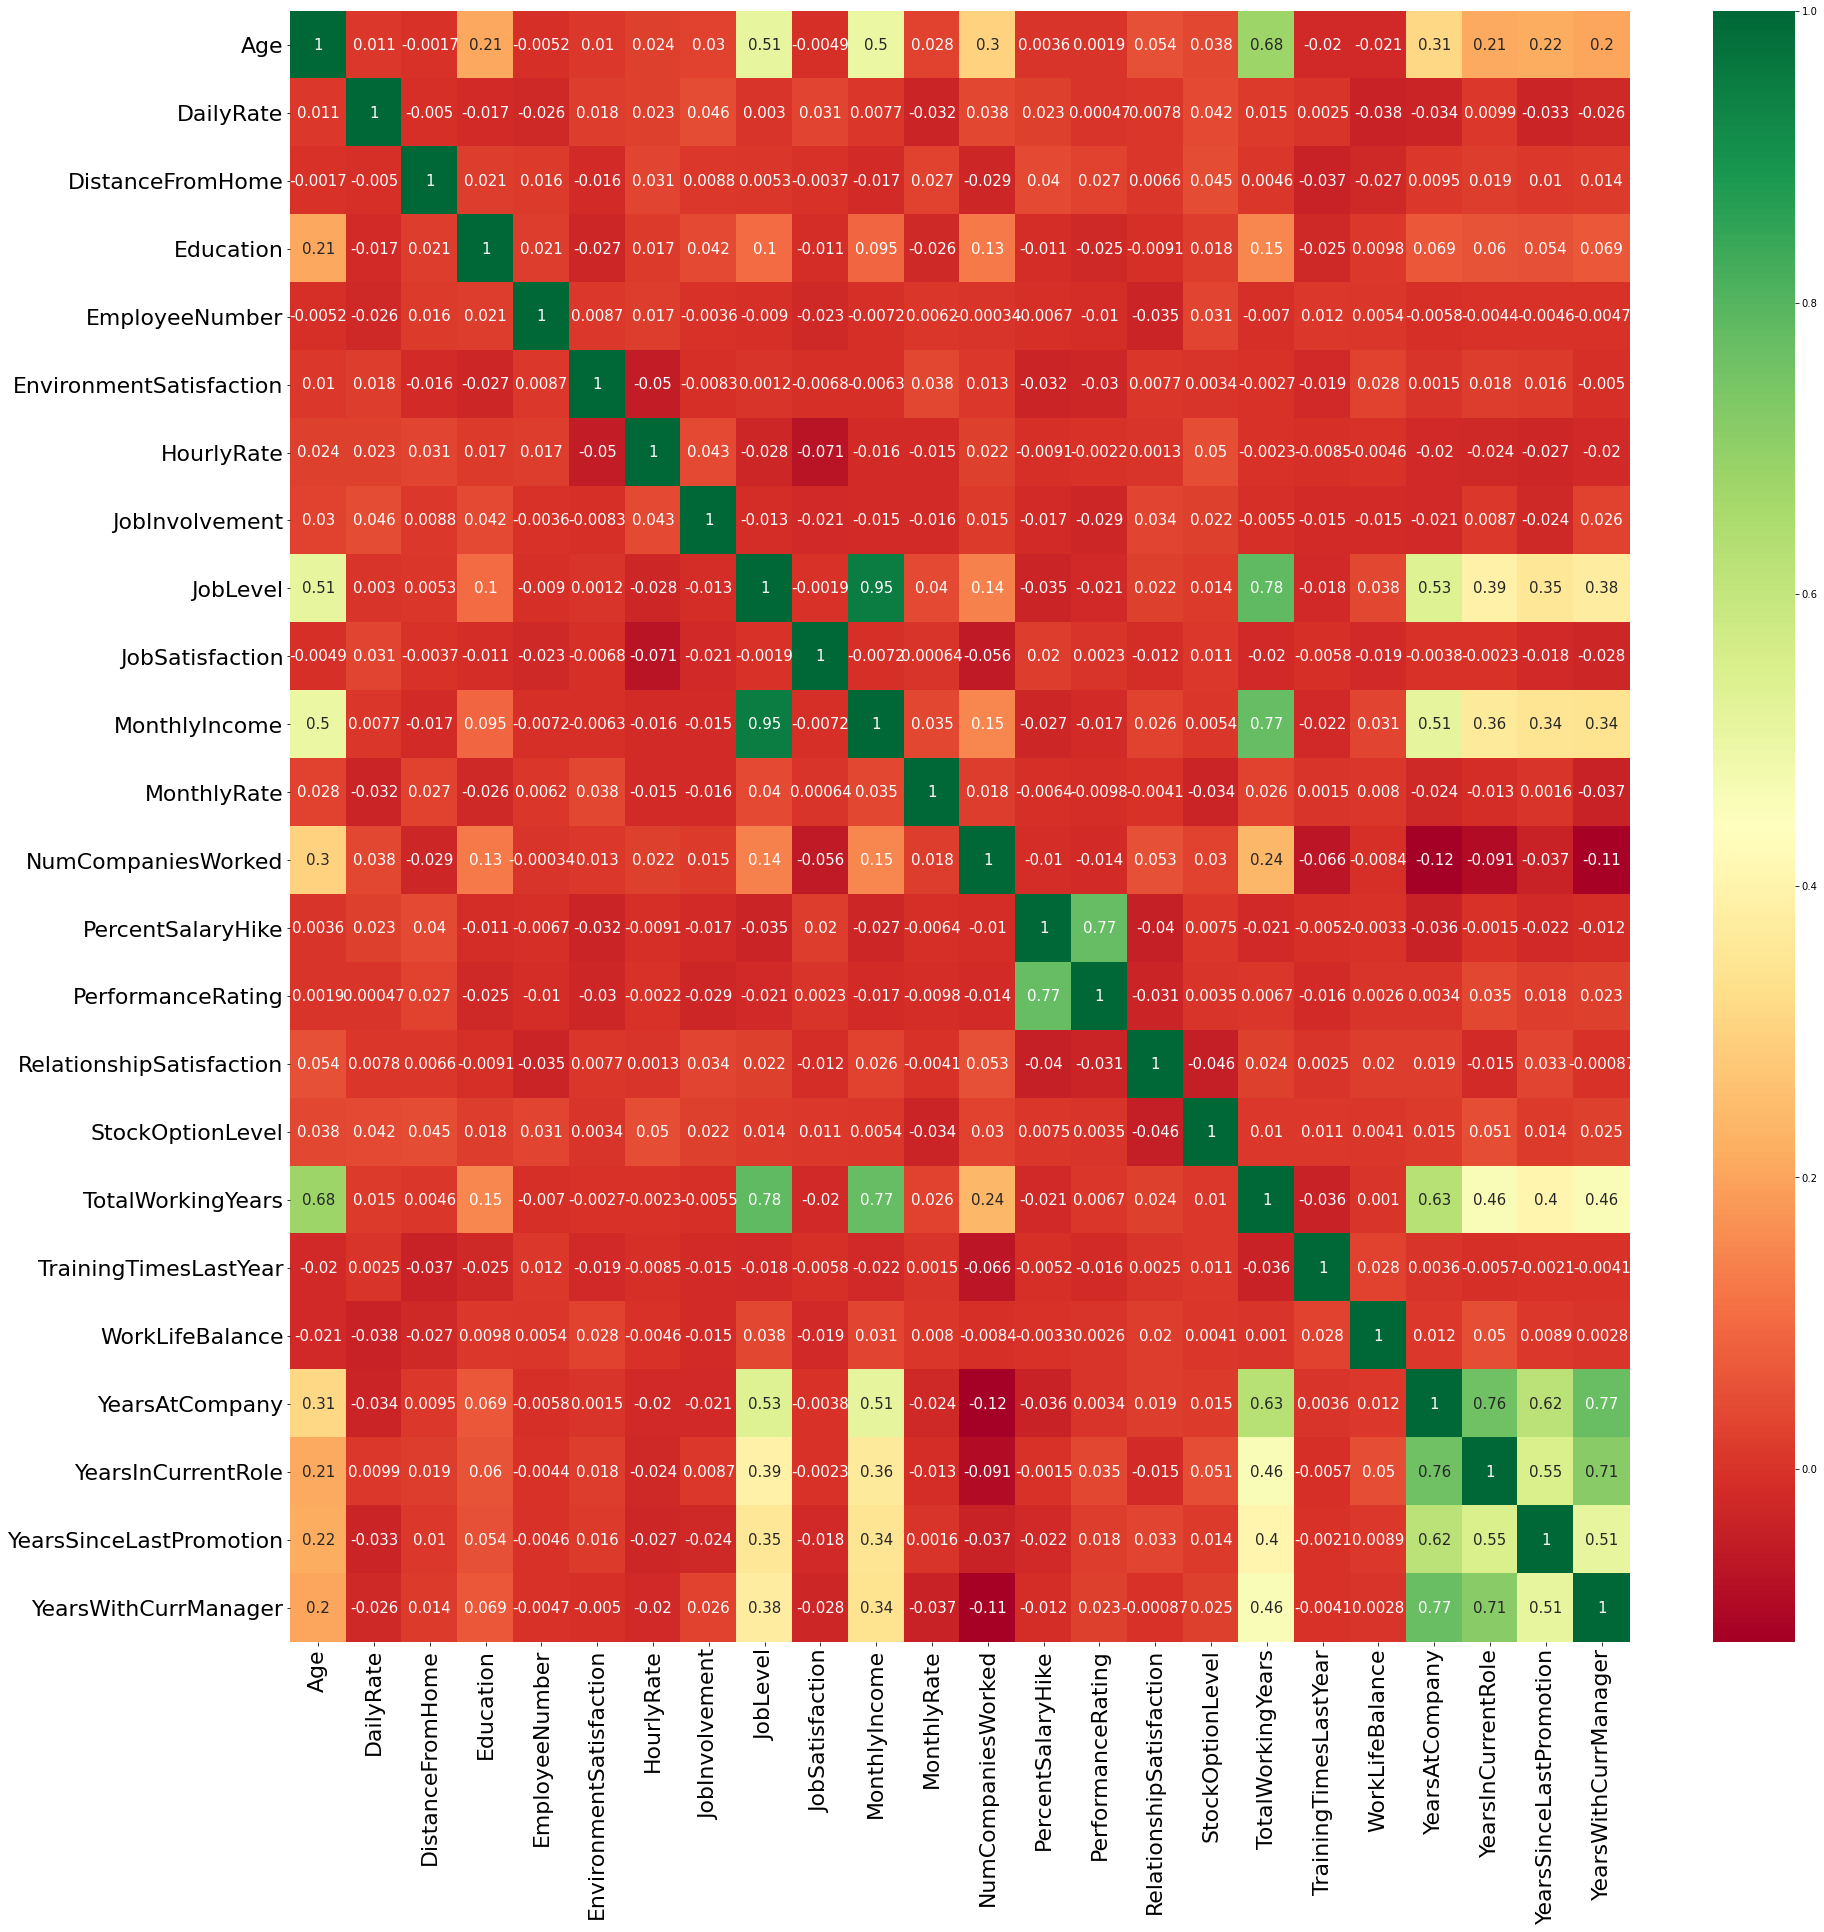

In [200]:
plt.figure(figsize=(30, 30))
sns.heatmap(df_emp.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

📊Conclusion:    
1. MonthlyIncome is strongly correlated to JobLevel.
2. JobLevel is also highly correlated to TotalWorkingYears.
3. YearsAtcompany is highly correlated to YerasWithCurrManager.

In [107]:
df_emp.describe(include=["object"])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,2940,2940,2940,2940,2940,2940,2940,2940
unique,2,3,3,6,2,9,3,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,2466,2086,1922,1212,1764,652,1346,2108


## Converting labels to Nominal data

In [108]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc,confusion_matrix
import numpy as np

For the categorical columns like [Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus and OverTime],    we are doing label Encoding

In [120]:
def encod_Col(df):
    df_emp1= df.copy()
    le = preprocessing.LabelEncoder()

    df_emp1["Attrition"] = le.fit_transform(df_emp1["Attrition"])
    df_emp1["BusinessTravel"] = le.fit_transform(df_emp1["BusinessTravel"])
    df_emp1["Department"] = le.fit_transform(df_emp1["Department"])
    df_emp1["EducationField"] = le.fit_transform(df_emp1["EducationField"])
    df_emp1["Gender"] = le.fit_transform(df_emp1["Gender"])
    df_emp1["JobRole"] = le.fit_transform(df_emp1["JobRole"])
    df_emp1["MaritalStatus"] = le.fit_transform(df_emp1["MaritalStatus"])
    df_emp1["OverTime"] = le.fit_transform(df_emp1["OverTime"])
    return df_emp1

encoded_data = encod_Col(df_emp)
    
    

In [122]:
encoded_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,3,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,5,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


#  👾 Applying machine learning algorithms

In [123]:
from sklearn.model_selection import train_test_split, GridSearchCV

#Segregating the Independent and the dependant variable
y = encoded_data["Attrition"].values
X = encoded_data.drop(["Attrition"],axis =1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
x


In [124]:
y_train.shape

(2058,)

In [128]:
X_train.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2377,44,2,1099,2,5,3,2,2378,2,1,88,3,5,3,2,1,18213,8751,7,0,11,3,3,1,26,5,3,22,9,3,10
2109,49,2,1418,1,1,3,5,2110,3,0,36,3,1,6,1,1,3580,10554,2,0,16,3,2,1,7,2,3,4,2,0,2
2397,36,2,429,1,2,4,1,2398,3,0,53,3,2,4,2,2,5410,2323,9,1,11,3,4,0,18,2,3,16,14,5,12
2855,34,2,1239,2,13,4,3,2856,4,1,39,3,3,7,3,0,8628,22914,1,0,18,3,3,1,9,2,2,8,7,1,1
2008,41,2,314,0,1,3,0,2009,4,1,59,2,5,3,3,1,19189,19562,1,0,12,3,2,1,22,3,3,22,7,2,10


## Random Forest Classifier

In [133]:
## Building model with tree size 100.
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from urllib.request import urlopen 


# evaluate(rf_clf, X_train, X_test, y_train, y_test)

In [137]:
X = encoded_data.drop('Attrition', axis=1)
y = encoded_data.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,
                                                    stratify=y)

In [138]:
X_train.shape

(2058, 31)

In [139]:
y_train.shape

(2058,)

In [164]:
# Set the random state for reproducibility
mod_rf = RandomForestClassifier(random_state=42)

## Finding best parameters using GridSearch CV

In [172]:
np.random.seed(42)


param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2'],
              'criterion': ['gini', 'entropy']}

rf_clf = GridSearchCV(mod_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 2)

rf_clf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', rf_clf.best_params_)


Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto'}


Parameters to Use: Best Parameters using grid search: 
- {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'max_features': None}

In [202]:
## Building model with Tree size 400 amd best Parameters using GridSearch CV

mod_rf.set_params(n_estimators = 400,
                  criterion = 'entropy',
                  max_features = 'auto', 
                  max_depth = 4,
                  bootstrap = True)



RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=400,
                       random_state=42)

## Training the model 

In [203]:
mod_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=400,
                       random_state=42)

In [204]:
## Training and Testing score 

score_train = mod_rf.score(X_train, y_train)
print(f" Training Score: {score_train}")
print()
score_test = mod_rf.score(X_test, y_test)
print(f" Testing Score: {score_test}")

 Training Score: 0.8561710398445093

 Testing Score: 0.8571428571428571


In [205]:
#caluclating the probabilities for the AUC curve

y_pred_prob = mod_rf.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.57475372, 0.19396087, 0.11661144, 0.10623325, 0.1825061 ,
       0.10075671, 0.49039715, 0.25365457, 0.13315204, 0.27976232,
       0.05249317, 0.07995551, 0.09646186, 0.33226419, 0.15349907,
       0.12742625, 0.15303646, 0.18499973, 0.51117581, 0.08509437,
       0.13500915, 0.1191394 , 0.18817448, 0.40803568, 0.13168014,
       0.18503277, 0.08199369, 0.12037777, 0.07479304, 0.07565342,
       0.12169861, 0.14918408, 0.06689173, 0.09252715, 0.120864  ,
       0.10512198, 0.1002876 , 0.05678892, 0.09582602, 0.08563639,
       0.14532293, 0.24969822, 0.09340473, 0.11581171, 0.06569418,
       0.31822045, 0.12173711, 0.27665419, 0.06751352, 0.30103324,
       0.09553583, 0.12156372, 0.06721061, 0.10282521, 0.06893432,
       0.19877883, 0.10145467, 0.29675639, 0.10072654, 0.21439339,
       0.15208911, 0.12119177, 0.24682318, 0.3019653 , 0.12009147,
       0.1656759 , 0.0625178 , 0.11386239, 0.1401602 , 0.05807746,
       0.17092861, 0.24409798, 0.21187451, 0.23861684, 0.08478

In [206]:
#Predicting the Attrition for X_test
y_pred = mod_rf.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Performance Metrics



In [207]:
## model accuracy...

print(f" Model Accuracy: {mod_rf.score(X_test, y_test)}")
print()
print(f" Recall: {recall_score(y_test, y_pred)}")

 Model Accuracy: 0.8571428571428571

 Recall: 0.11267605633802817


📊 Our Model is giving 85.26 % acuurate prediction...

In [208]:
## Area Under the curve...
tpr_dt, fpr_dt, _ = roc_curve(y_test, y_pred_prob)
roc_auc_dt = auc(fpr_dt, tpr_dt)

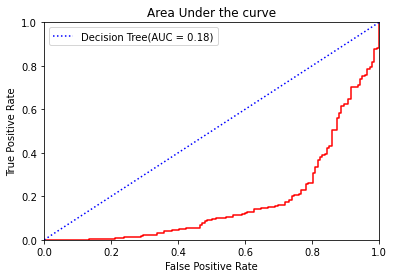

In [215]:
## Plotting Area Under the Curve

plt.plot(fpr_dt, tpr_dt, color='red')
plt.plot([0,1], [0,1], color = 'blue', linestyle = ':', label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Area Under the curve")
plt.legend(loc="upper left")
plt.show()

In [210]:
#Printing confusion matrix
print(confusion_matrix(y_test, y_pred))

[[740   0]
 [126  16]]


In [211]:
def create_conf_mat(test_class_set, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(test_class_set.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (test_class_set.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = test_class_set,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

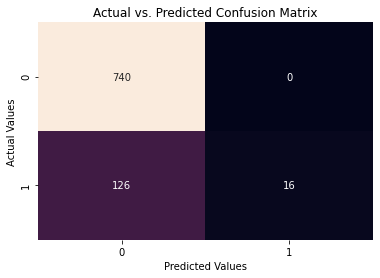

In [212]:
conf_mat = create_conf_mat(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

## Plotting feature Importance...

Feature ranking:
1. feature 19 (0.122397)
2. feature 16 (0.099302)
3. feature 12 (0.080371)
4. feature 24 (0.072890)
5. feature 0 (0.071550)
6. feature 27 (0.065078)
7. feature 30 (0.057982)
8. feature 23 (0.056579)
9. feature 18 (0.032887)
10. feature 15 (0.029265)
11. feature 28 (0.027631)
12. feature 4 (0.027134)
13. feature 13 (0.025331)
14. feature 11 (0.024390)
15. feature 14 (0.019798)
16. feature 2 (0.019368)
17. feature 10 (0.018091)
18. feature 8 (0.017926)
19. feature 17 (0.016901)
20. feature 26 (0.016025)
21. feature 1 (0.014369)
22. feature 3 (0.012668)
23. feature 6 (0.012337)
24. feature 7 (0.011965)
25. feature 29 (0.011509)
26. feature 20 (0.010246)
27. feature 25 (0.009568)
28. feature 22 (0.009247)
29. feature 5 (0.003116)
30. feature 9 (0.002734)
31. feature 21 (0.001344)


Text(0.5, 0, 'index of the feature')

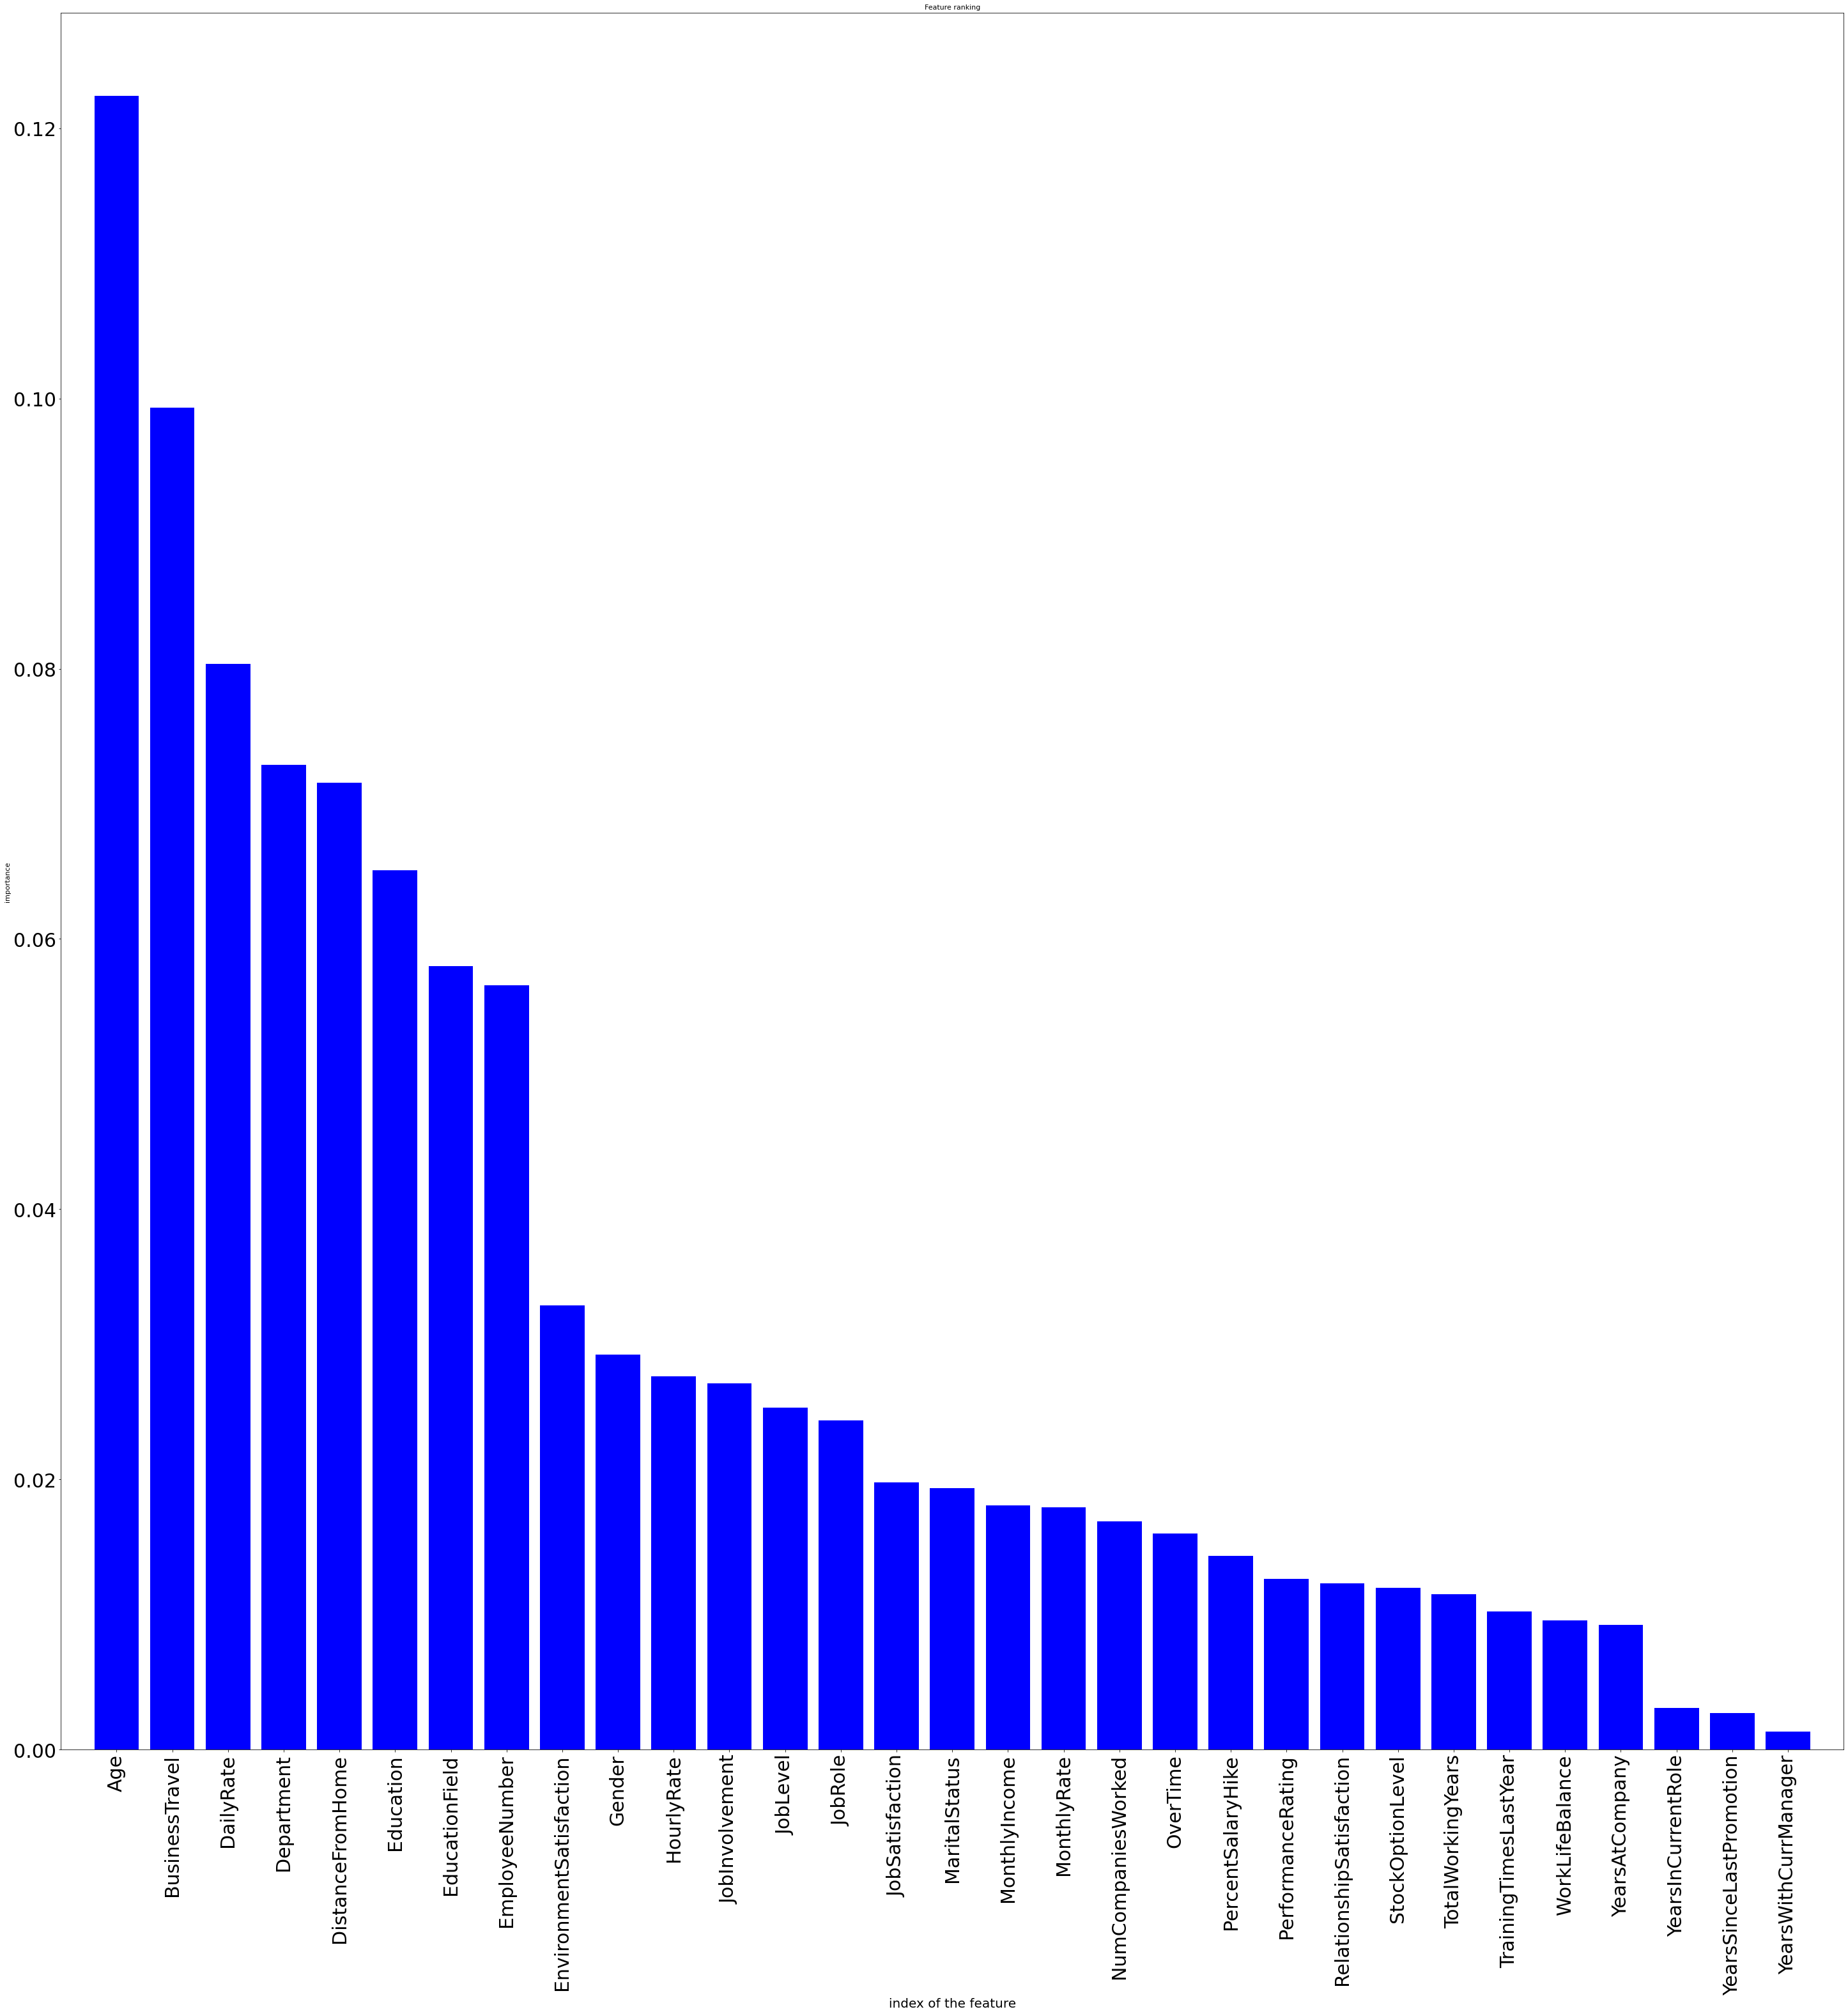

In [213]:
importances= mod_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
f, ax = plt.subplots(figsize=(50,50))
plt.title("Feature ranking", fontsize = 11)
plt.bar(range(X_train.shape[1]), importances[indices],
    color="b", 
    align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation = 90, fontsize =30 )
plt.yticks(fontsize=30)
plt.xlim([-1, X_train.shape[1]])
plt.ylabel("importance", fontsize = 11)
plt.xlabel("index of the feature", fontsize = 20)
    
    

    
    

📊: Age and Business Travel are the most important features followed by DailyRate and Department.